In [33]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df=pd.read_excel("Healthcare_dataset.xlsx",sheet_name="Dataset")

In [25]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [26]:
df.drop("Ptid",axis=1,inplace=True)

In [61]:
print("The number of rows: "+str(df.shape[0]))
print("The number of columns: "+str(df.shape[1]))

The number of rows: 3424
The number of columns: 68


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

In [6]:
df.isnull().sum().sum()

0

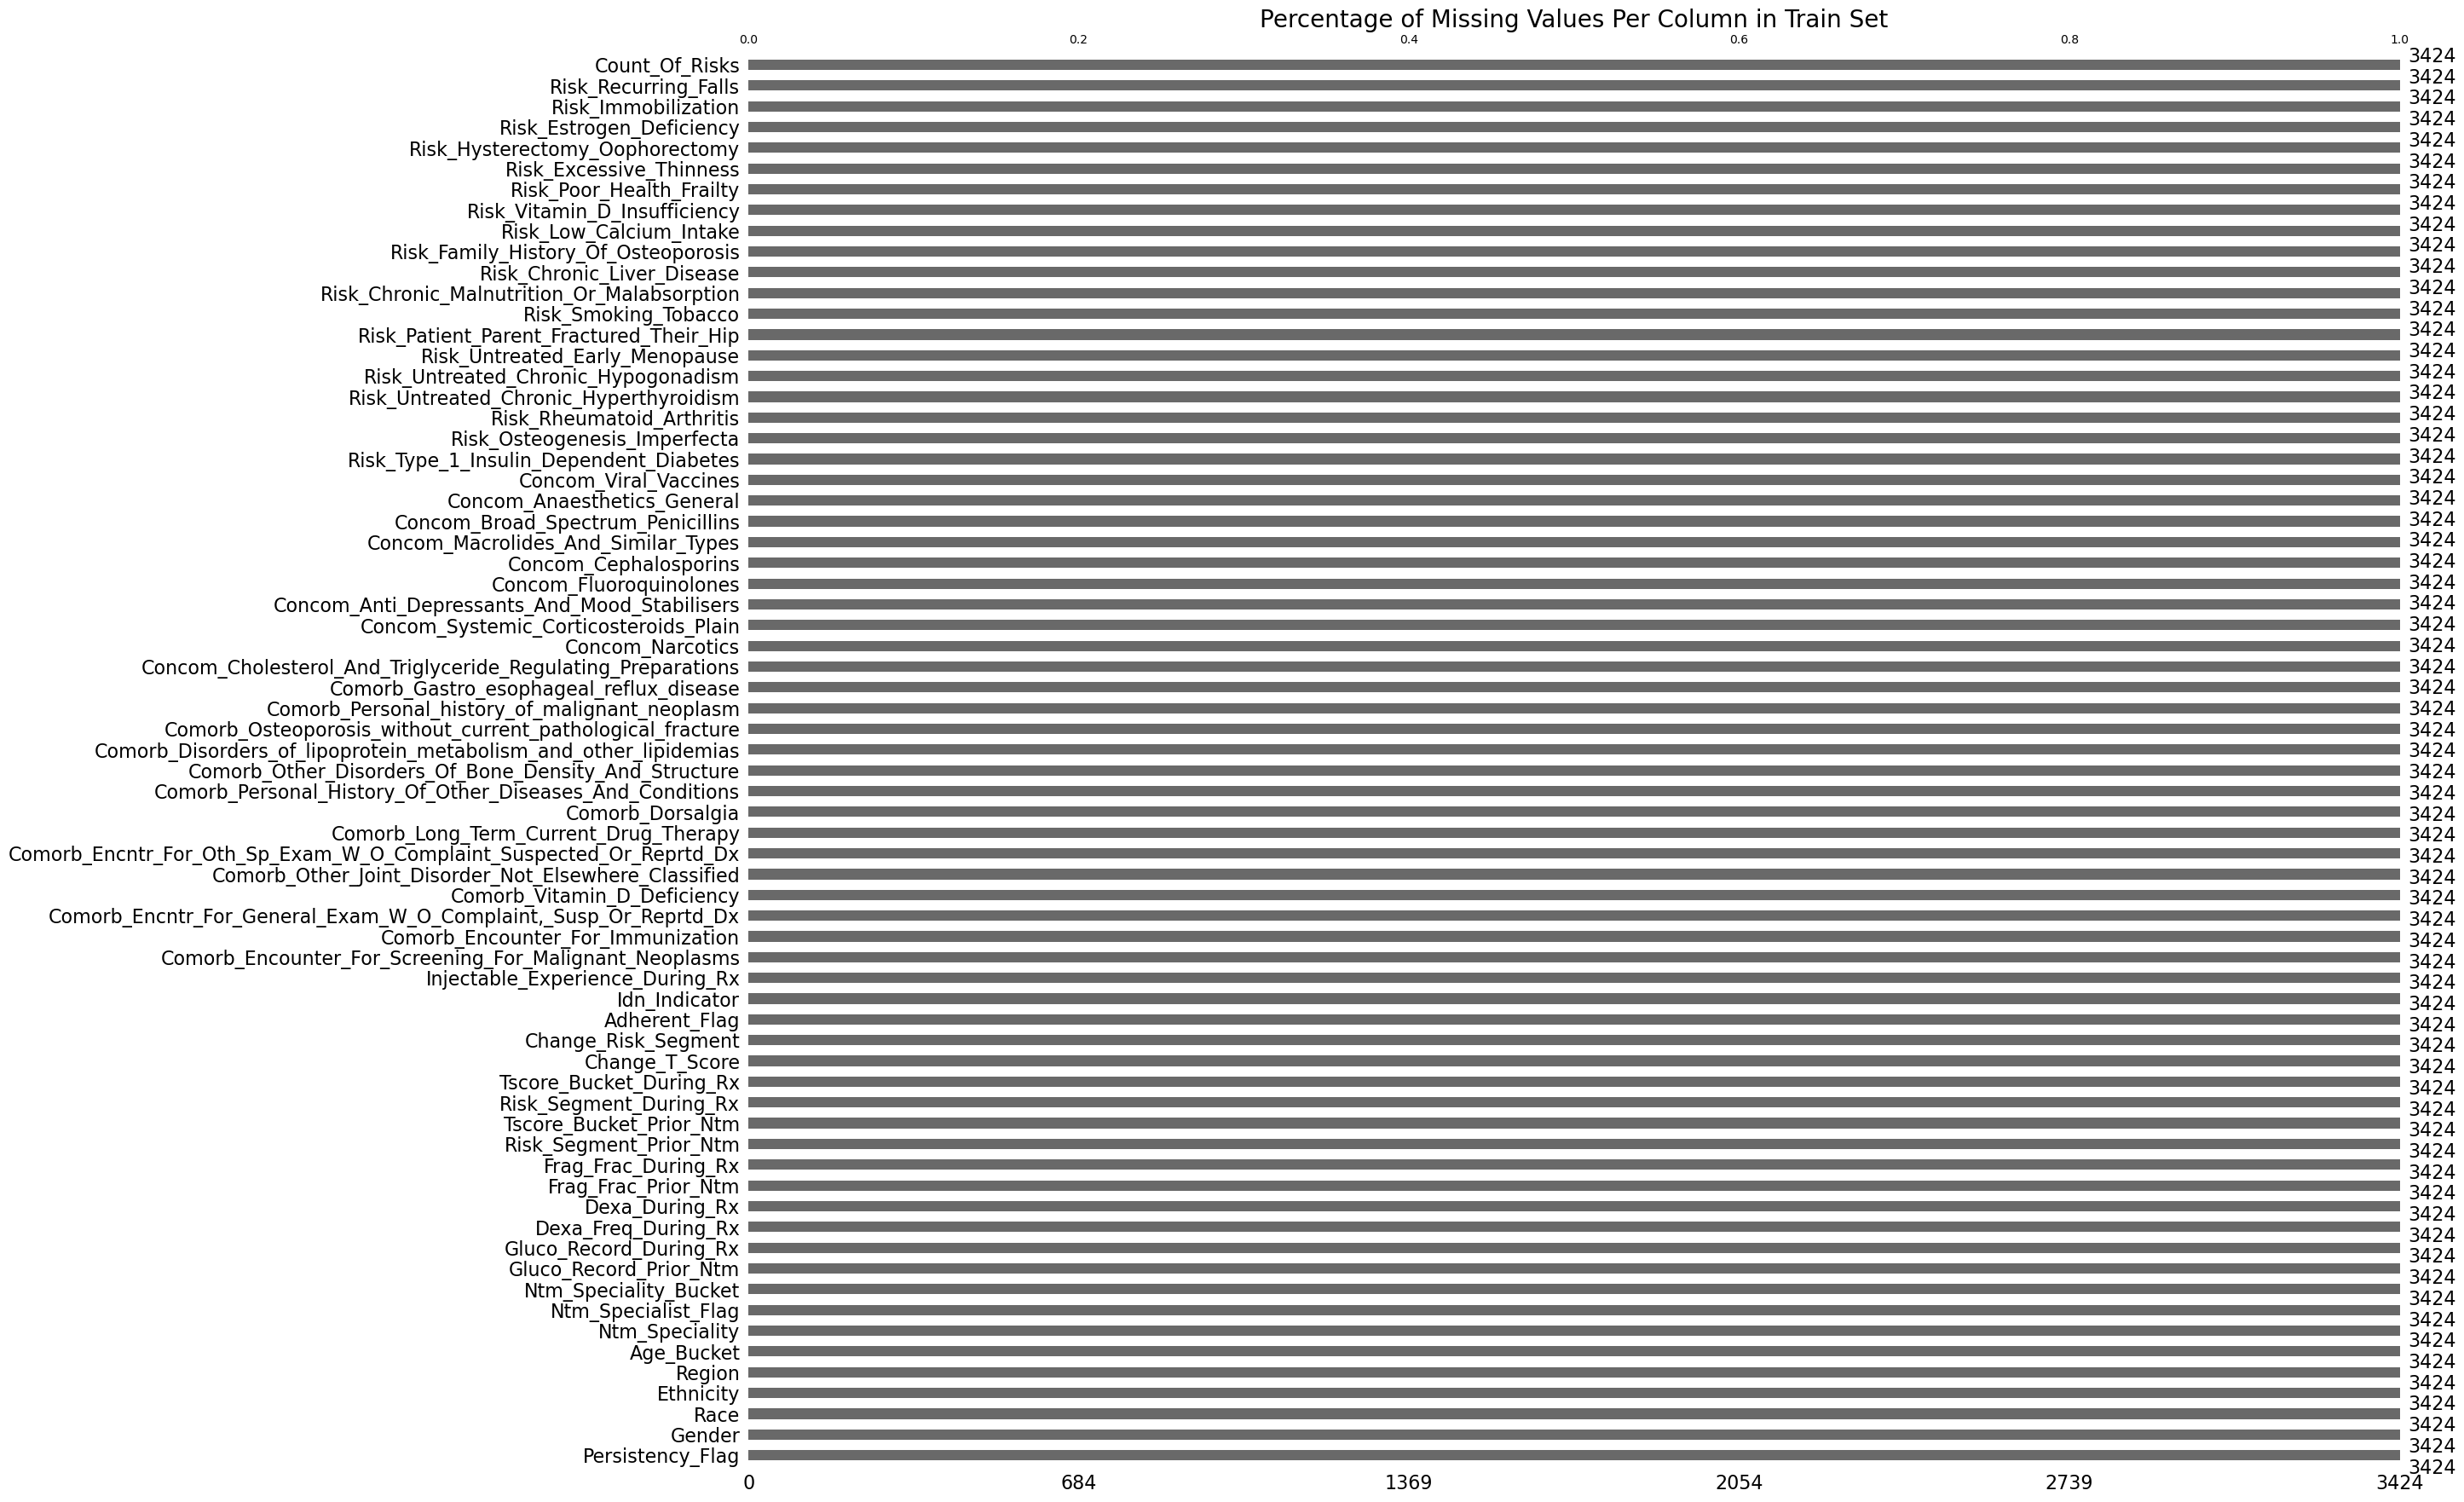

In [45]:
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':20})
msno.bar(df);


In [29]:
df.nunique().sort_values()

Persistency_Flag                                                2
Comorb_Personal_history_of_malignant_neoplasm                   2
Comorb_Gastro_esophageal_reflux_disease                         2
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations     2
Concom_Narcotics                                                2
                                                               ..
Age_Bucket                                                      4
Region                                                          5
Count_Of_Risks                                                  8
Ntm_Speciality                                                 36
Dexa_Freq_During_Rx                                            58
Length: 68, dtype: int64

In [48]:
df.Dexa_Freq_During_Rx.value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
2        24
1        24
13       19
20       15
16       14
18       14
22       13
24       10
26       10
15        9
30        7
28        7
17        7
21        7
36        5
42        3
19        3
32        3
34        3
48        2
58        2
39        2
52        2
88        2
25        2
81        1
72        1
108       1
69        1
110       1
68        1
66        1
54        1
118       1
29        1
50        1
45        1
44        1
40        1
38        1
37        1
35        1
33        1
27        1
23        1
146       1
Name: Dexa_Freq_During_Rx, dtype: int64

In [30]:
for column in df.columns:
        calculation=(len(df[column])-df[column].nunique())/len(df[column])*100   #If the difference of uniq values from the data set is greater than 90 percent, we should qualify it as Categorical.
        if calculation>90 :
             df[column]=df[column].astype("category")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Persistency_Flag                                                    3424 non-null   category
 1   Gender                                                              3424 non-null   category
 2   Race                                                                3424 non-null   category
 3   Ethnicity                                                           3424 non-null   category
 4   Region                                                              3424 non-null   category
 5   Age_Bucket                                                          3424 non-null   category
 6   Ntm_Speciality                                                      3424 non-null   category
 7   Ntm_Sp

In [34]:
import missingno as msno

In [68]:
df.describe()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,2,2,4,3,5,4,36,2,3,2,...,2,2,2,2,2,2,2,2,2,8
top,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
freq,2135,3230,3148,3235,1383,1439,1535,2013,2104,2619,...,3066,3382,1788,3232,3357,3370,3413,3410,3355,1242


In [84]:
df.describe().T.reset_index().sort_values("unique",ascending=False)

,index,count,unique,top,freq
11,Dexa_Freq_During_Rx,3424,58,0,2488
6,Ntm_Speciality,3424,36,GENERAL PRACTITIONER,1535
67,Count_Of_Risks,3424,8,1,1242
4,Region,3424,5,Midwest,1383
20,Change_Risk_Segment,3424,4,Unknown,2229
...,...,...,...,...,...
1,Gender,3424,2,Female,3230
35,Comorb_Osteoporosis_without_current_pathologic...,3424,2,N,2507
36,Comorb_Personal_history_of_malignant_neoplasm,3424,2,N,2775
37,Comorb_Gastro_esophageal_reflux_disease,3424,2,N,2794
